In [1]:
# Import Necesary Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset

df = pd.read_csv("D:\ExcelR\Data Science\Assignments\Clustering\Airlines_data.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,18476,0,1,1,1,8525,4,200,1,1403,1
3995,3996,64385,0,1,1,1,981,5,0,0,1395,1
3996,3997,73597,0,3,1,1,25447,8,0,0,1402,1
3997,3998,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df1 = df.drop(columns='ID#')

In [4]:
from sklearn.preprocessing import normalize

df1_norm = pd.DataFrame(normalize(df1), columns = df1.columns)
df1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


### Hierarchical Clustering

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

Text(0, 0.5, 'Euclidean Distances')

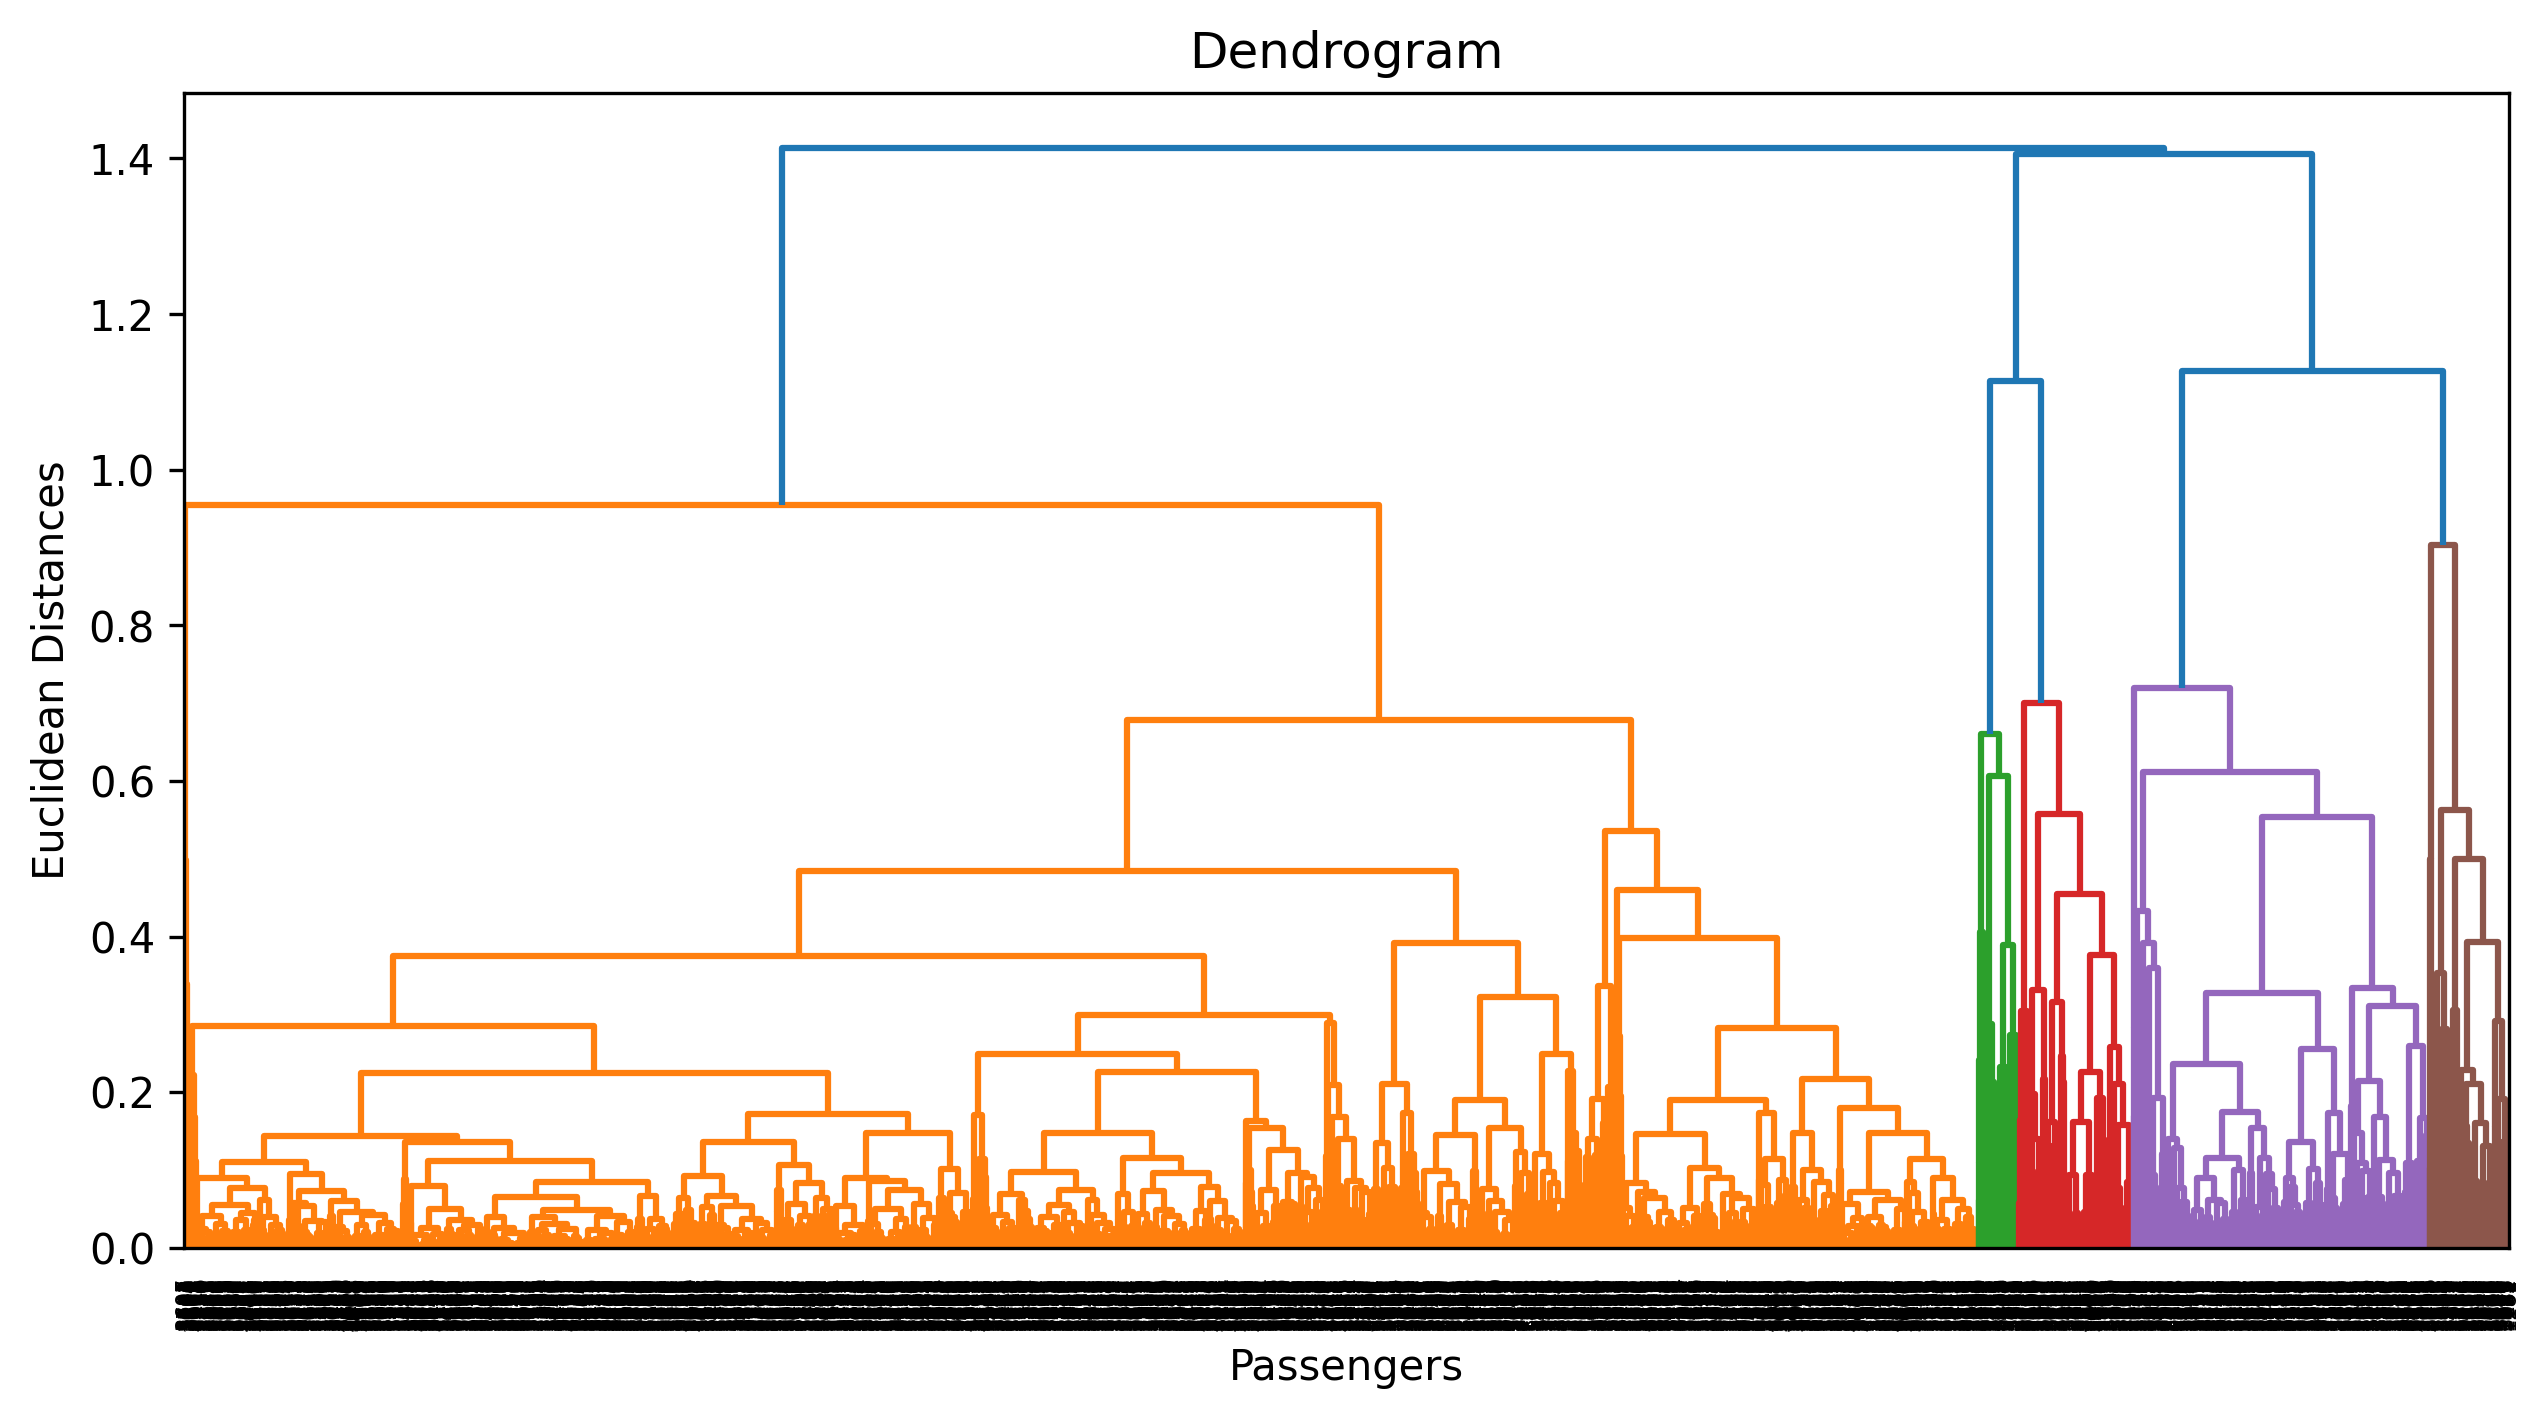

In [6]:
# Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='complete'))

# Visualize the dendrogram
plt.title('Dendrogram')
plt.xlabel('Passengers')
plt.ylabel('Euclidean Distances')

In [7]:
from sklearn.cluster import AgglomerativeClustering

hclusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [8]:
y = pd.DataFrame(hclusters.fit_predict(df1_norm), columns=['Clusters'])
y['Clusters'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: Clusters, dtype: int64

In [9]:
df1['Clusters'] = hclusters.labels_
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [10]:
df1.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


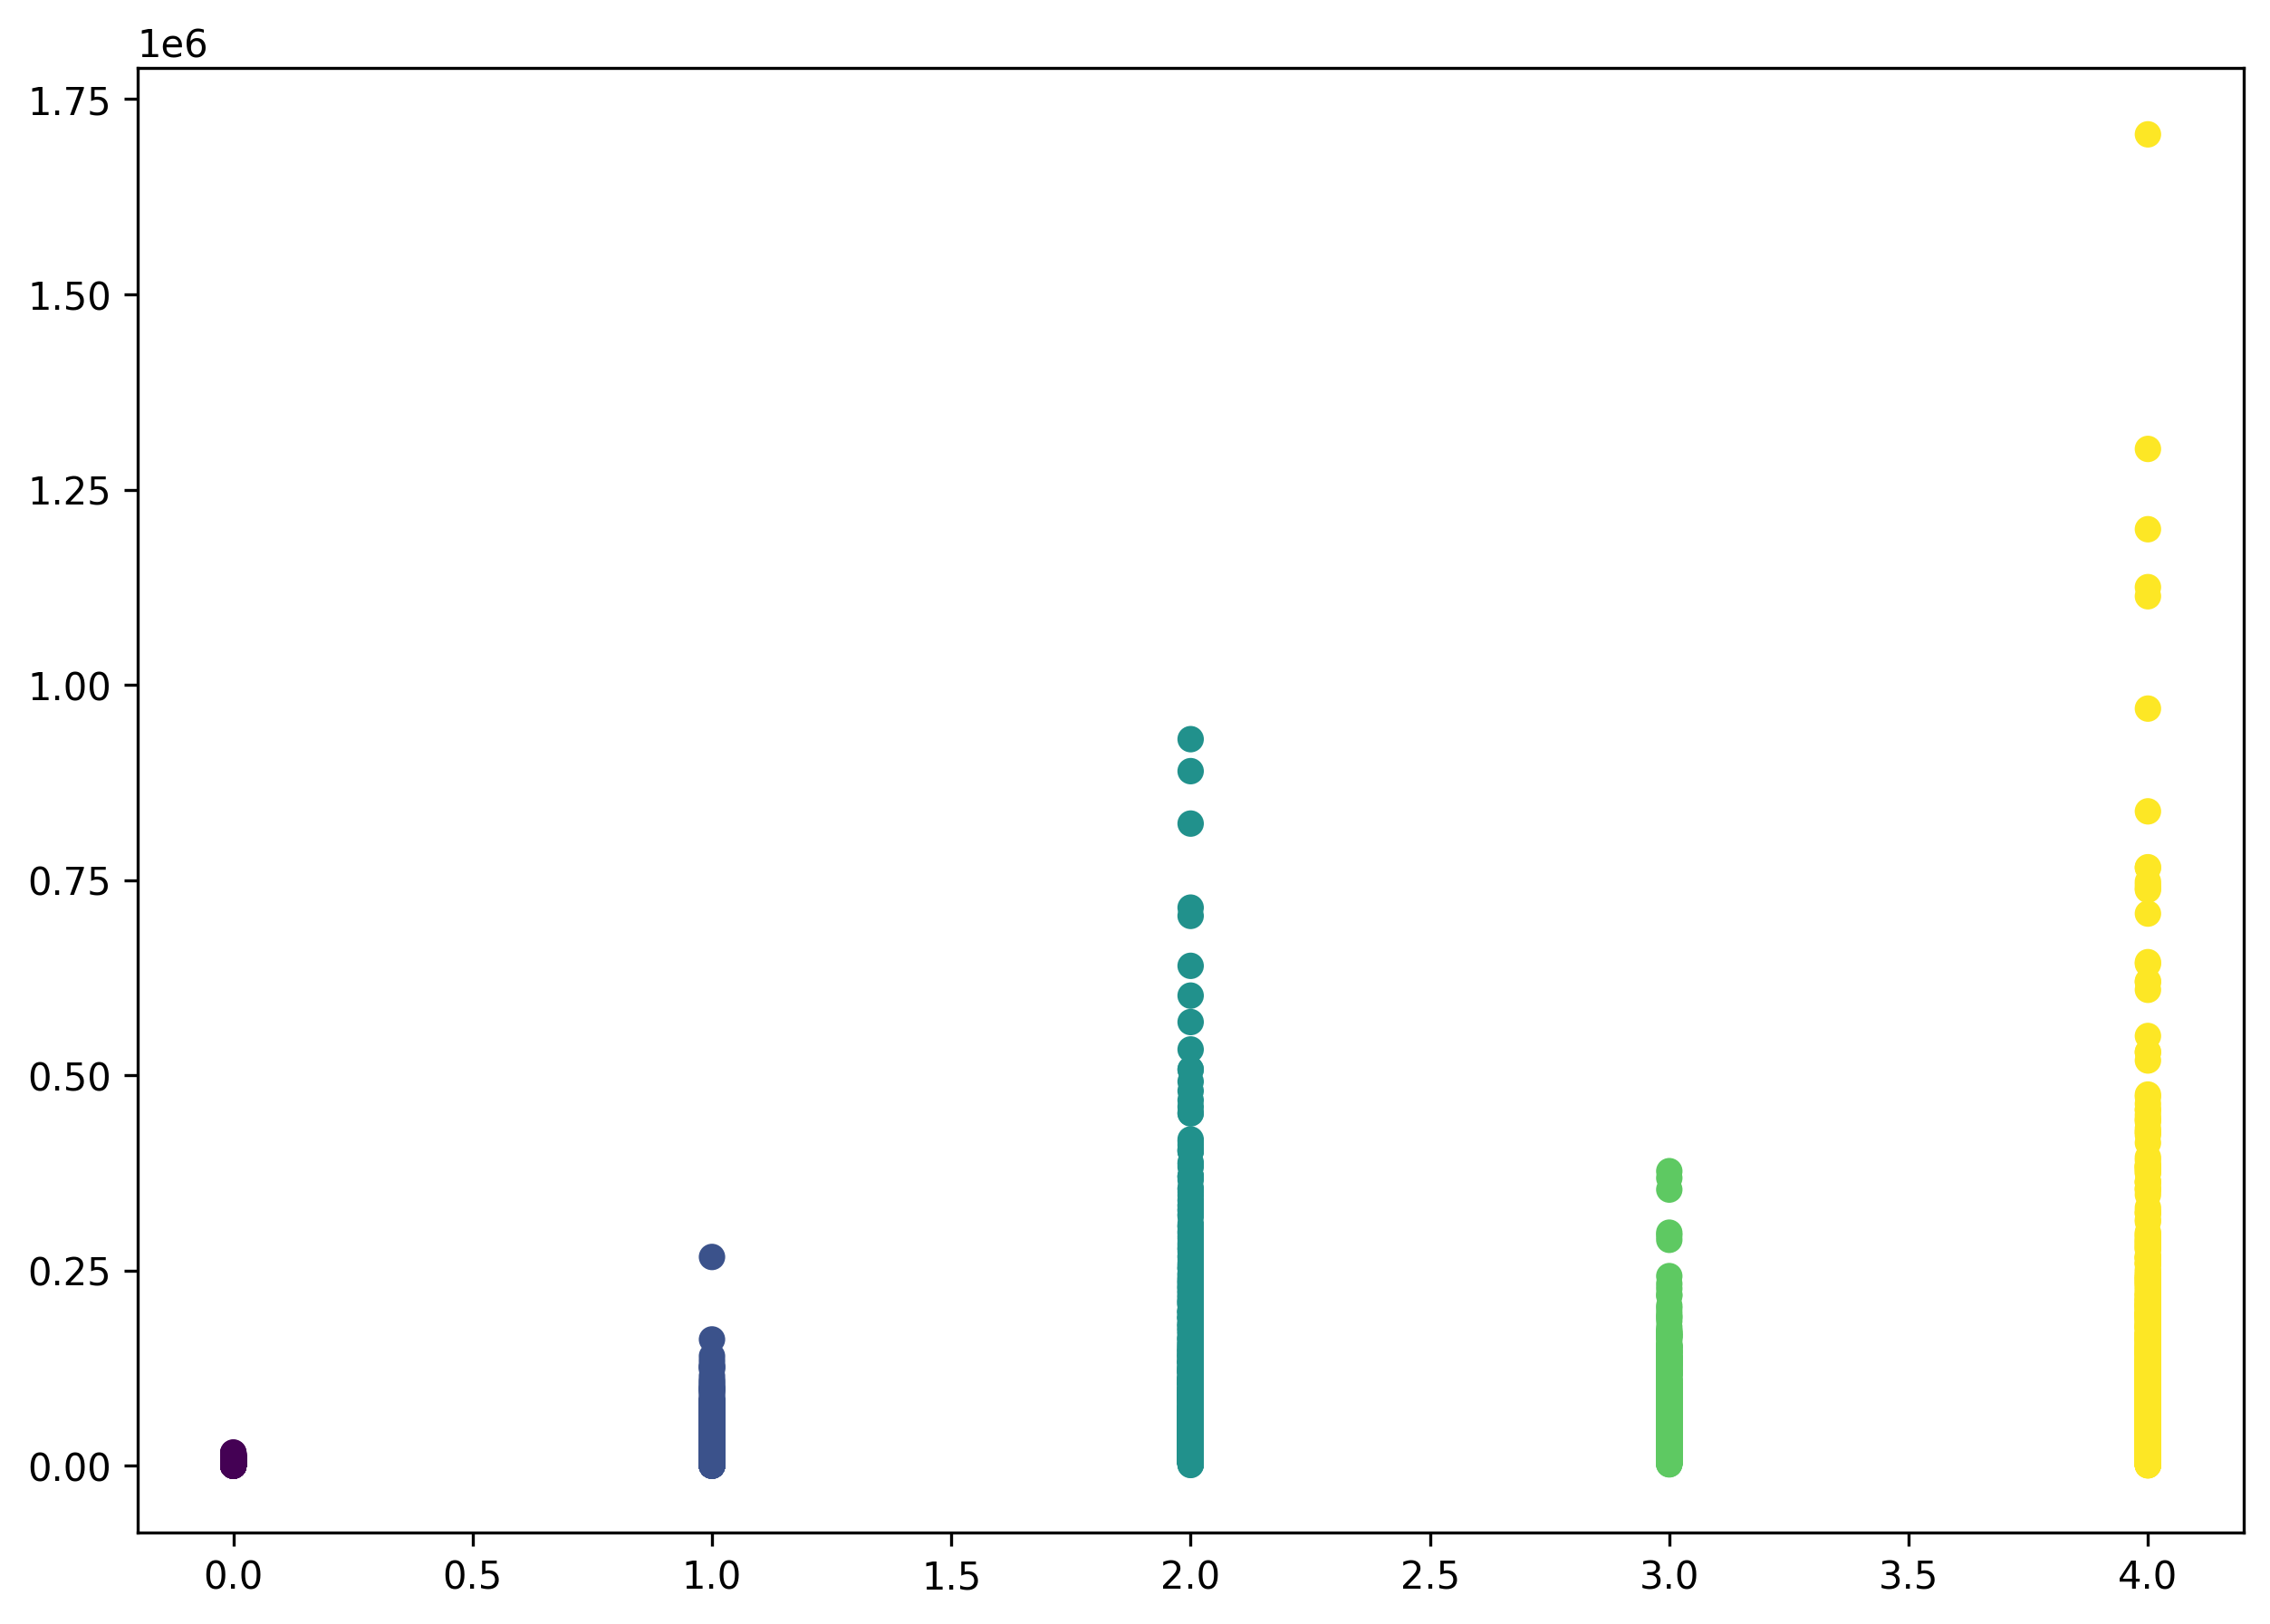

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(df1['Clusters'], df1['Balance'], c = hclusters.labels_)

### K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

df2 = df.copy()
df2 = df2.drop(columns='ID#')
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [14]:
df
df2_norm = norm_func(df2)

Text(0, 0.5, 'WCSS')

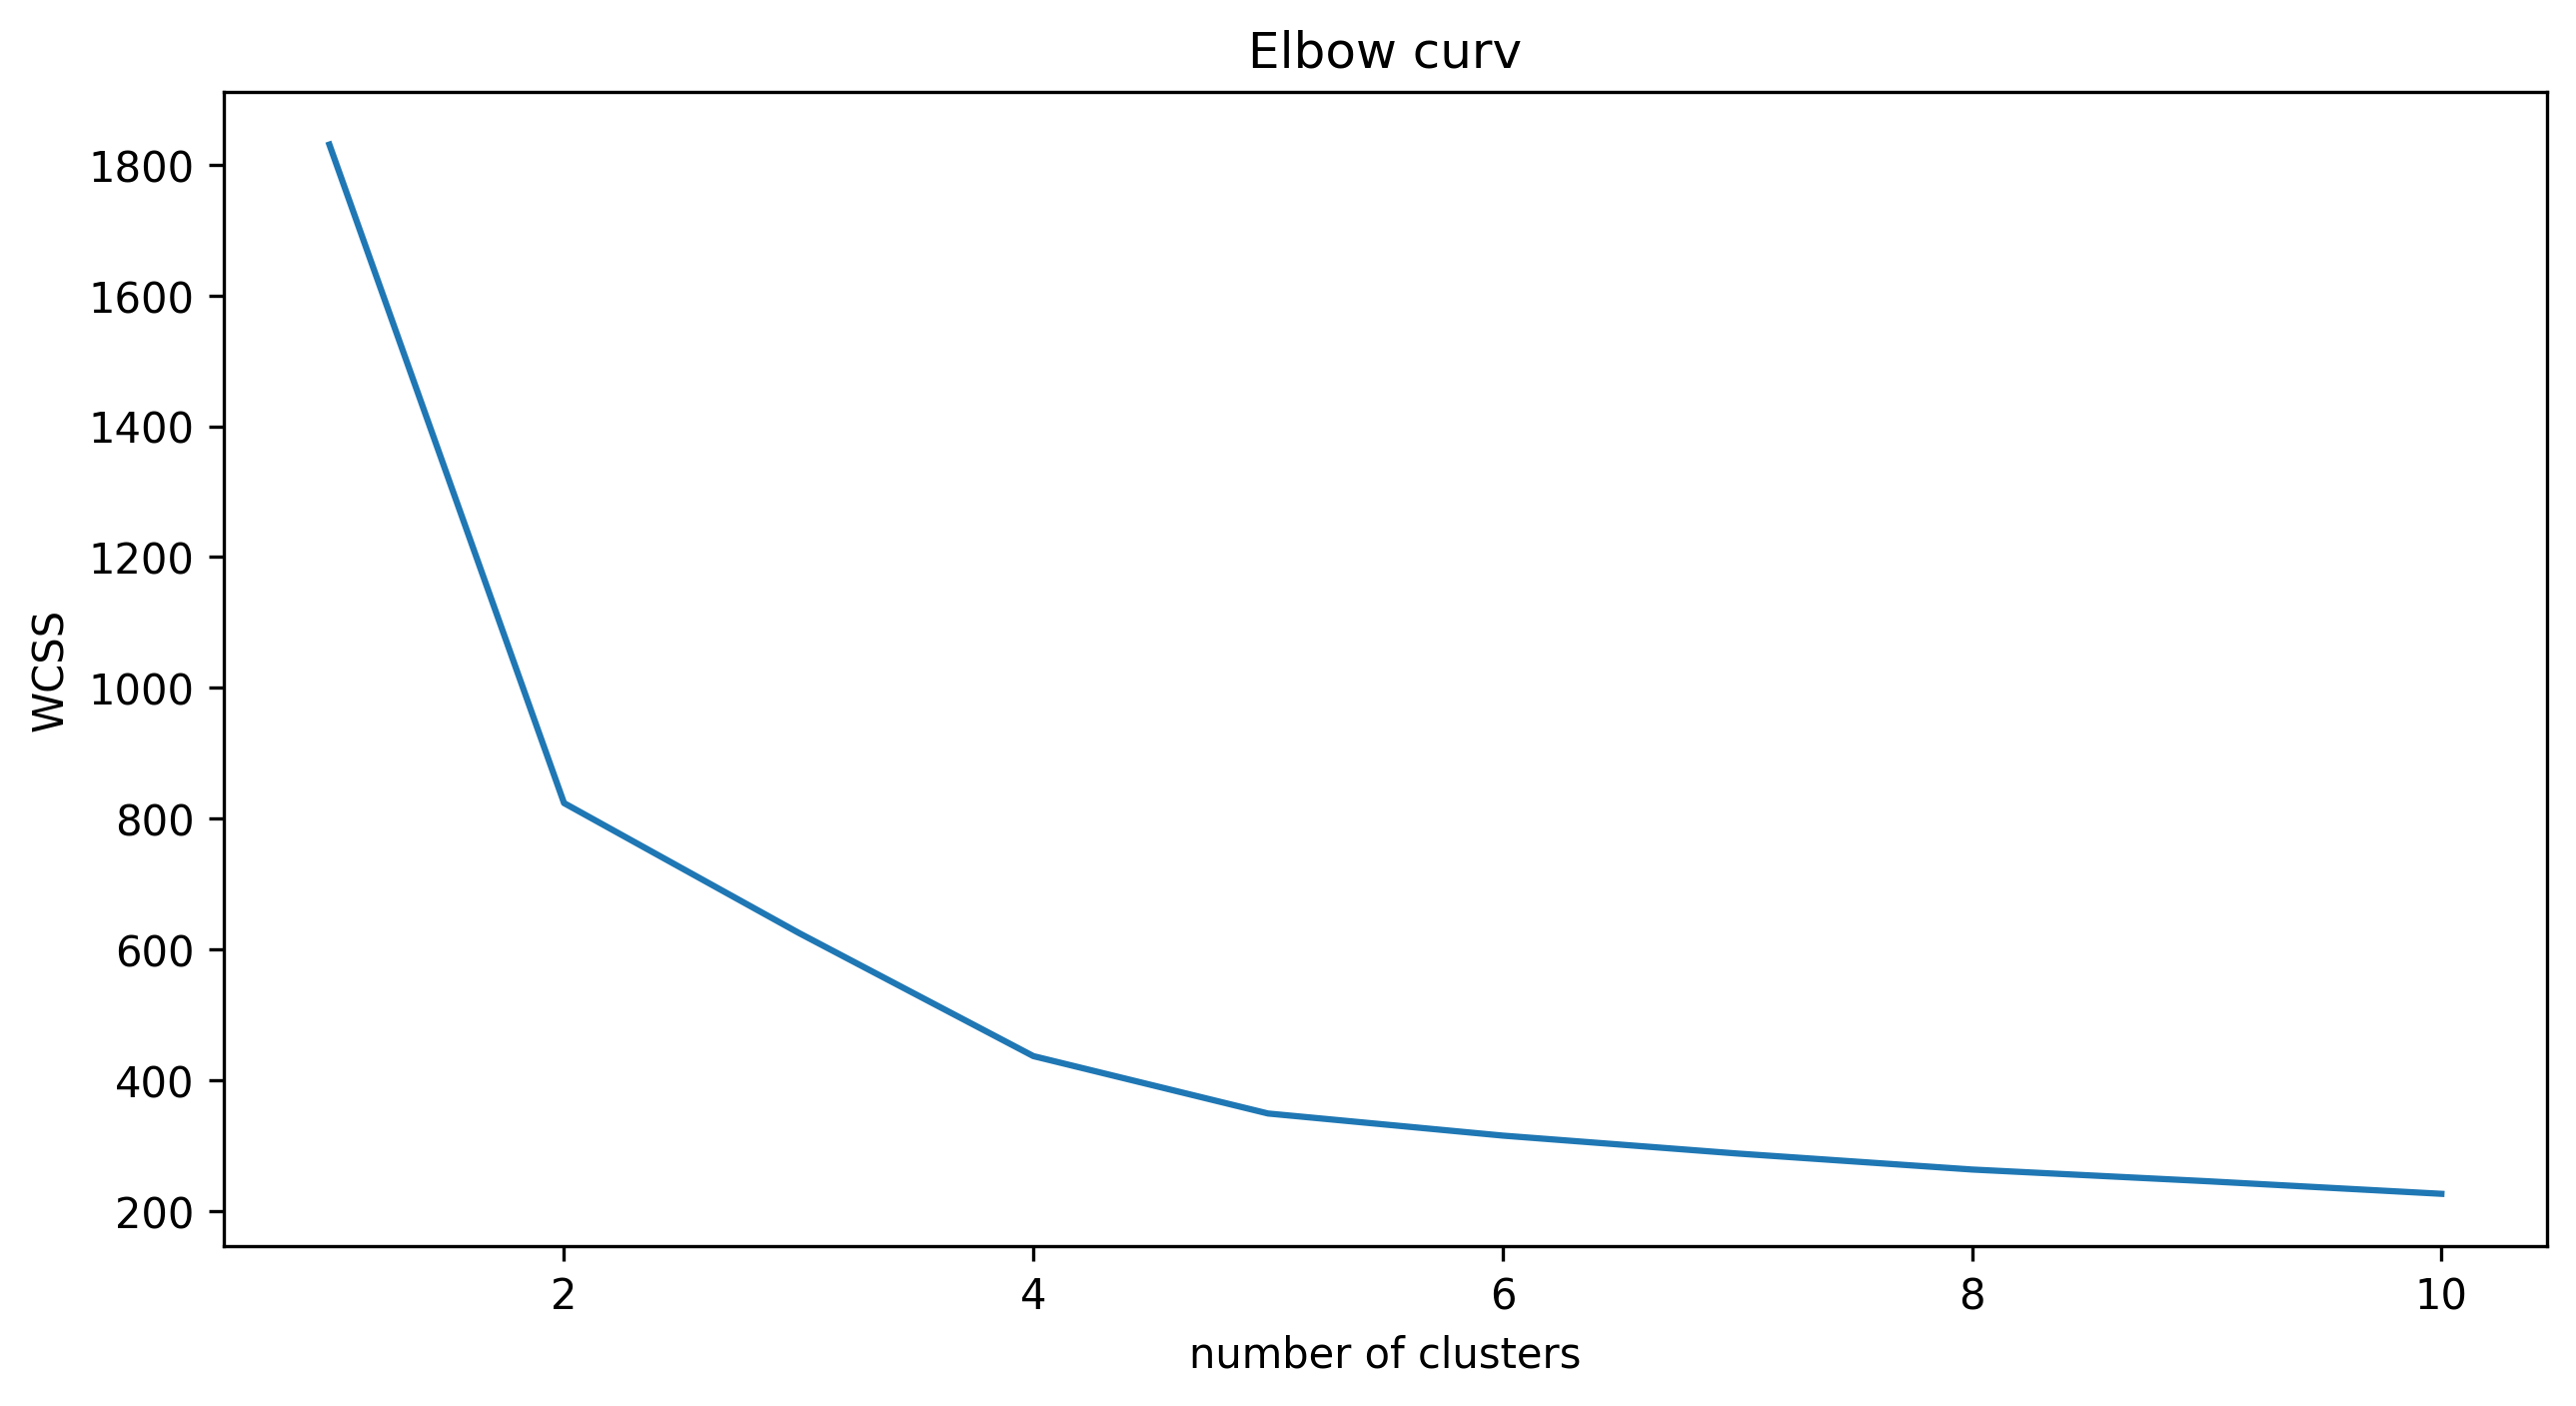

In [15]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [16]:
model = KMeans(n_clusters=4)
model.fit(df2_norm)
model.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [17]:
x = pd.Series(model.labels_)
df2['Cluster'] = x
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
df2.iloc[:,1:5].groupby(df2.Cluster).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles
Cluster,,,,
0,92.345809,1.092778,1.017923,1.004217
1,290.453195,1.156018,1.032689,1.008915
2,73.112721,3.576490,1.001610,1.022544
3,198.336634,3.915842,1.001238,1.025990


### DBSCAN Clustering 

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df3 = df.copy()
df3 = df3.drop(columns='ID#')
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
sc = StandardScaler()
df3_scaled = sc.fit_transform(df3)
df3_scaled

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [25]:
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(df3_scaled)

DBSCAN(eps=2)

In [26]:
df3['Clusters'] = dbscan.labels_
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
